In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
comments = pd.read_csv(r'/content/drive/MyDrive/Datasets/Youtube_Data/additional_data/UScomments.csv', on_bad_lines='skip')

In [ ]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
comments.isnull().sum()

,0
video_id,0
comment_text,26
likes,0
replies,0


### Removing Null Values

In [ ]:
comments.dropna(inplace=True)
comments.isnull().sum()

,0
video_id,0
comment_text,0
likes,0
replies,0


## Sentiment Analysis

### Installing TextBlob Library for Sentiment Analysis

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

### Storing sentiment polarity of each comment in a list

In [ ]:
polarity = []

for comment in comments['comment_text']:
  polarity.append(TextBlob(comment).sentiment.polarity)

In [ ]:
len(polarity)

691374

In [ ]:
comments['polarity'] = polarity

In [ ]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


### The sentiment analysis gives an idea if a particular comment is a positive, neutral or negative comment

## Wordcloud Analysis

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
filter1 = comments['polarity']==1

In [ ]:
comments_positive = comments[filter1]

In [ ]:
filter2 = comments['polarity']==-1

In [ ]:
comments_negative = comments[filter2]

In [ ]:
comments['comment_text']

,comment_text
0,Logan Paul it's yo big day ‼️‼️‼️
1,I've been following you from the start of your...
2,Say hi to Kong and maverick for me
3,MY FAN . attendance
4,trending 😉
...,...
691395,Лучшая
691396,qu'est ce que j'aimerais que tu viennes à Roan...
691397,Ven a mexico! 😍 te amo LP
691398,Islığı yeter...


In [ ]:
type(comments['comment_text'])

pandas.core.series.Series

In [ ]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [ ]:
wordcloud_positive = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

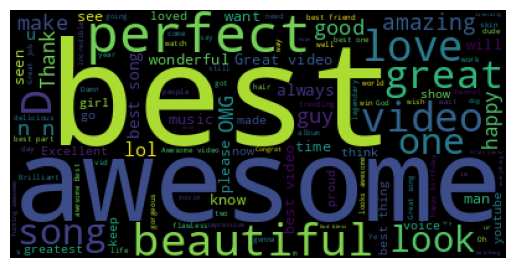

In [ ]:
plt.imshow(wordcloud_positive)
plt.axis('off')

In [ ]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [ ]:
wordcloud_negative = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

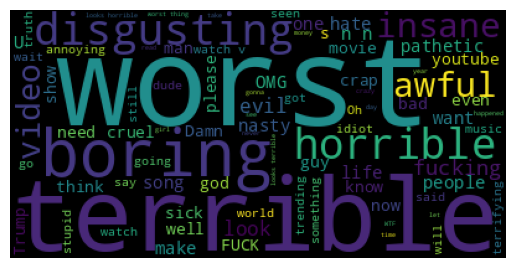

In [ ]:
plt.imshow(wordcloud_negative)
plt.axis('off')

### The wordcloud analysis shows what are the most commonly used words in case of positive and negative comments

## Emoji Analysis

In [ ]:
!pip install emoji==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234910 sha256=b35baa24ae6e1046ad3fca44339f0d6869712b228cdd723755406cae67923067
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
import emoji

In [ ]:
emoji_list = []

for comment in comments['comment_text']:
  for c in comment:
    if c in emoji.EMOJI_DATA:
      emoji_list.append(c)

In [ ]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [ ]:
from collections import Counter

In [ ]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [ ]:
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [ ]:
frequencies = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
trace = go.Bar(
    x = emojis,
    y = frequencies,
)

In [ ]:
iplot([trace])

### This emoji analysis depicts the top 10 emojis that have been used in the comments with the laughing emoji being most frequently used

## Collection of Entire Youtube Data

In [ ]:
import os

In [ ]:
files = os.listdir(r'/content/drive/MyDrive/Datasets/Youtube_Data/additional_data1')

In [ ]:
files_csv = [file for file in files if '.csv' in file]

In [ ]:
full_df = pd.DataFrame()

for file in files_csv:
  temp_df = pd.read_csv(r'/content/drive/MyDrive/Datasets/Youtube_Data/additional_data1/' + file, encoding='iso-8859-1', on_bad_lines='skip')
  full_df = pd.concat([full_df, temp_df], ignore_index=True)

In [ ]:
full_df.shape

(375942, 16)

## Exporting Data into CSV, JSON, databases

In [ ]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [ ]:
full_df = full_df.drop_duplicates()

In [ ]:
full_df.shape

(339525, 16)

In [ ]:
full_df.to_csv('/content/drive/MyDrive/Datasets/Youtube_Data/export_data/youtube_sample.csv', index=False)

In [ ]:
full_df.to_json('/content/drive/MyDrive/Datasets/Youtube_Data/export_data/youtube_sample.json')

In [ ]:
from sqlalchemy import create_engine

In [ ]:
engine = create_engine(r'sqlite:///D:\Data Analyst Projects\Youtube_Data\youtube_sample.sqlite', echo=False)

In [ ]:
full_df.to_sql('Users', con=engine, if_exists='append')

339525

### Thus any available data can be transformed and loaded according to the need of the model

## Analysing the most liked category

In [ ]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [ ]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [ ]:
json_df = pd.read_json(r'/content/drive/MyDrive/Datasets/Youtube_Data/additional_data1/US_category_id.json')

In [ ]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [ ]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [ ]:
category_dict = {}

for item in json_df['items'].values:
  category_dict[item['id']] = item['snippet']['title']

In [ ]:
category_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [ ]:
full_df['category_id'] = full_df['category_id'].astype(str)
full_df['category_name'] = full_df['category_id'].map(category_dict)

In [ ]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

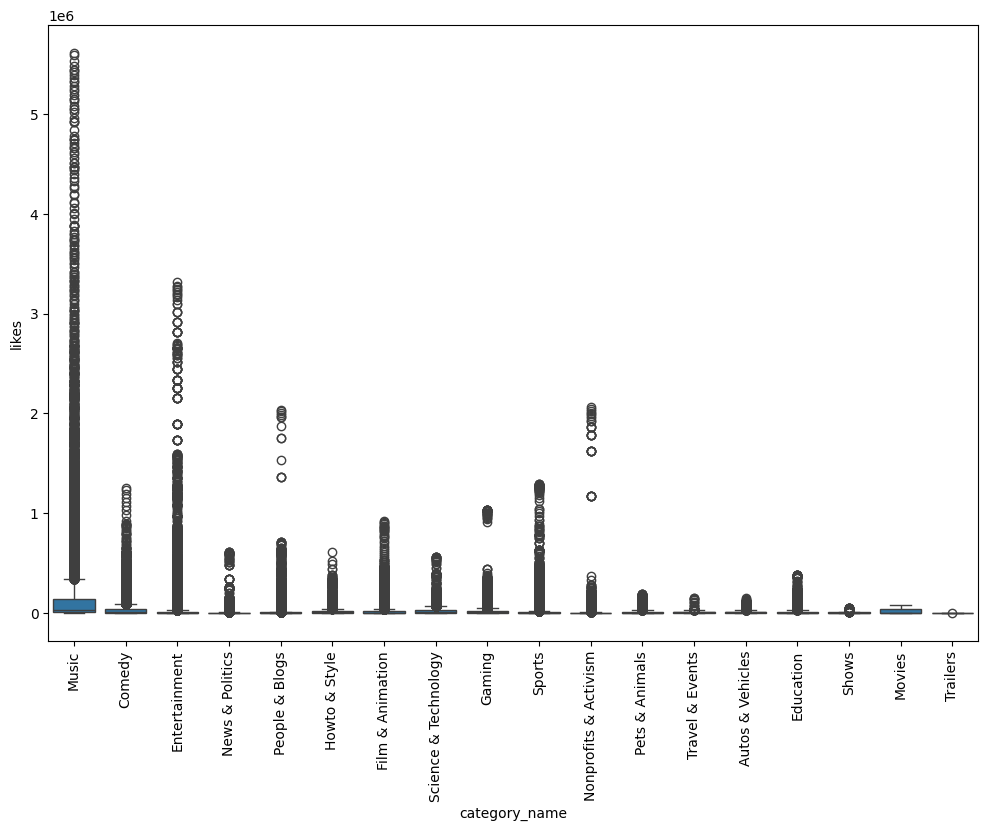

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation='vertical')

### The category analysis tells us that Music is the most liked category followed by Entertainment, Nonprofits and activism, Blogs and Sports

## Analysing Audience Engagement

In [ ]:
full_df['like_rate'] = full_df['likes']/full_df['views']*100
full_df['dislike_rate'] = full_df['dislikes']/full_df['views']*100
full_df['comment_count_rate'] = full_df['comment_count']/full_df['views']*100

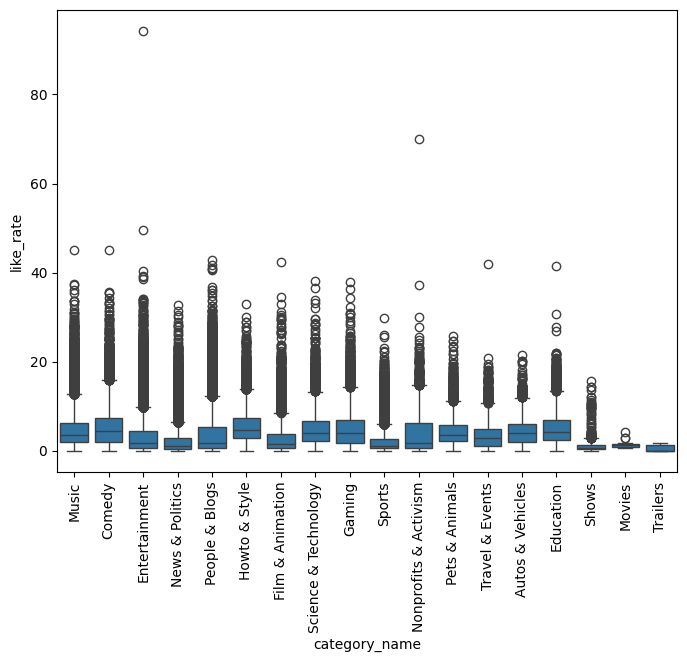

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name', y='like_rate', data=full_df)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='views', ylabel='likes'>

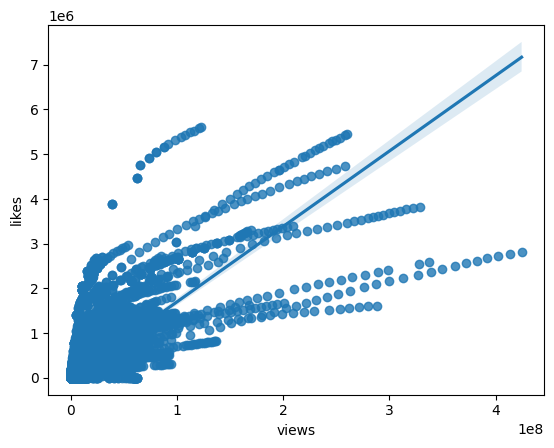

In [ ]:
sns.regplot(x='views', y='likes', data=full_df)

In [ ]:
full_df[['views', 'likes', 'dislikes', 'comment_count']].corr()

,views,likes,dislikes,comment_count
views,1.000000,0.779531,0.405428,0.489637
likes,0.779531,1.000000,0.451809,0.763874
dislikes,0.405428,0.451809,1.000000,0.747915
comment_count,0.489637,0.763874,0.747915,1.000000


<Axes: >

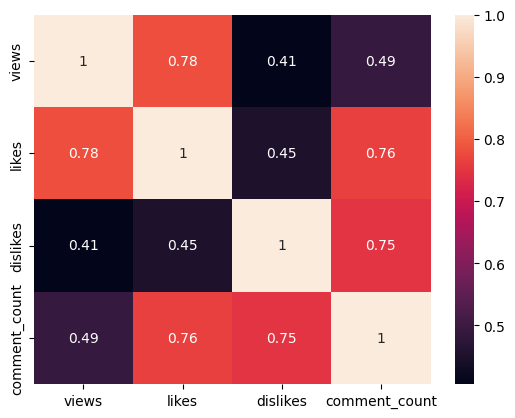

In [ ]:
sns.heatmap(full_df[['views', 'likes', 'dislikes', 'comment_count']].corr(), annot=True)

## Analysing Trending Videos

In [ ]:
full_df['channel_title'].value_counts()

,count
channel_title,
The Late Show with Stephen Colbert,710
WWE,643
Late Night with Seth Meyers,592
TheEllenShow,555
Jimmy Kimmel Live,528
...,...
Daas,1
YT Industries,1
BTLV Le mÃ©dia complÃ©mentaire,1


In [ ]:
cdf = full_df.groupby('channel_title').size().sort_values(ascending=False).reset_index()

In [ ]:
cdf = cdf.rename(columns={0:'total_videos'})
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [ ]:
import plotly.express as px

In [ ]:
px.bar(data_frame=cdf[0:20], x='channel_title', y='total_videos', title='Top 20 Channels with Most Videos')

### This bar plot depicts the channels with the most videos

## Does Punctuations have an impact on views, likes, dislikes?

In [ ]:
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
len([char for char in full_df['title'][0] if char in string.punctuation])

4

In [ ]:
def punctuation_count(text):
  count = len([char for char in text if char in string.punctuation])
  return count

In [ ]:
full_df['count_punc'] = full_df['title'].apply(punctuation_count)

In [ ]:
full_df['count_punc']

,count_punc
0,4
1,1
2,3
3,3
4,3
...,...
375936,0
375938,1
375939,3
375940,0


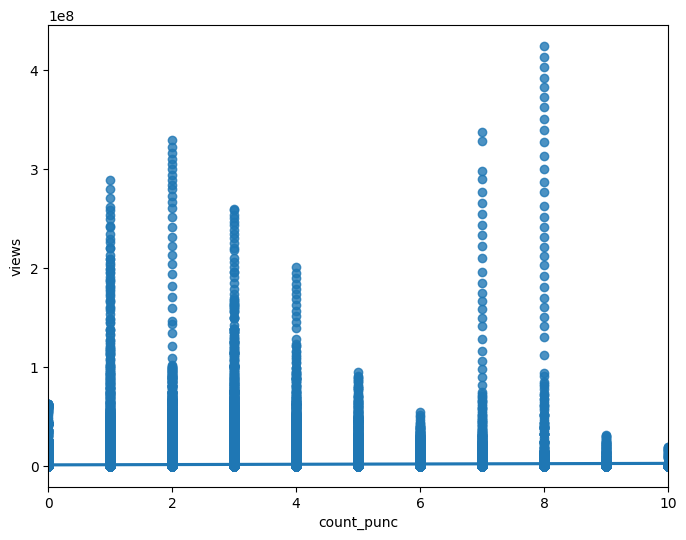

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='count_punc', y='views', data=full_df)
plt.xlim(0, 10)
plt.show()

### It can be concluded that video titles having 1, 2, 3, 7 or 8 punctuation marks have been viewed by the most amount of audience